### IS362 FINAL PROJECT

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

%matplotlib inline
sns.set(style="darkgrid")

We will atempt to do a very simple analysis on the nuimber of complaint received by the NYC Taxi & Limosine commission.

Data source: https://data.cityofnewyork.us/Social-Services/TLC-complaints/8qdh-n8ew

In [3]:
df = pd.read_csv("https://data.cityofnewyork.us/api/views/8qdh-n8ew/rows.csv")

Bring in CSV data from source and examine the data.

In [4]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,15633667,01/01/2010 11:02:43 AM,01/26/2010 02:13:07 AM,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,10461.0,1808 PARKVIEW AVENUE,...,NaN,NaN,JFK Airport,NaN,NaN,NaN,NaN,40.848654,-73.829070,"(40.84865368814068, -73.82906963666592)"
1,15633881,01/01/2010 06:52:52 PM,01/05/2010 03:17:45 PM,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,10466.0,NaN,...,NaN,NaN,JFK Airport,NaN,NaN,NaN,NaN,40.889925,-73.859301,"(40.8899253789202, -73.85930090931242)"
2,15634037,01/01/2010 03:27:18 AM,01/26/2010 02:12:48 AM,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,10456.0,NaN,...,NaN,NaN,Other,NaN,NaN,NaN,NaN,40.834432,-73.910343,"(40.83443182472168, -73.9103431200325)"
3,15634566,01/01/2010 06:19:30 AM,01/26/2010 02:13:03 AM,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,10470.0,NaN,...,NaN,NaN,Other,NaN,NaN,NaN,NaN,40.901244,-73.865466,"(40.90124357512368, -73.86546628014459)"
4,15636728,01/02/2010 01:54:11 PM,01/26/2010 02:12:00 AM,TLC,Taxi and Limousine Commission,For Hire Vehicle Complaint,Driver Complaint,Street,10467.0,NaN,...,Car Service,BRONX,NaN,NaN,NaN,NaN,NaN,40.881076,-73.878486,"(40.88107633375972, -73.87848591158738)"


In [46]:
tlc = df[['Complaint Type', 'Descriptor', 'Created Date',
          'Closed Date', 'Location Type', 'Incident Zip',
          'Vehicle Type']].copy()

We'll narrow the data into fields that we need.

And ehck the shape.

In [47]:
tlc.shape

(10073, 7)

Let's explore some of the unique values.

In [48]:
for col in tlc:
    print tlc[col].unique()

['Taxi Complaint' 'For Hire Vehicle Complaint' 'For Hire Vehicle Report'
 'Found Property' 'Taxi Report']
['Driver Complaint' 'Car Service Company Complaint' 'Vehicle Complaint'
 'Insurance Information Requested' 'Driver Report' 'Electronics/Phones'
 'Bag/Wallet' 'Other' 'Equipment Complaint' 'Car Service Company Report'
 'Vehicle Report' 'Clothing/Glasses']
['01/01/2010 11:02:43 AM' '01/01/2010 06:52:52 PM'
 '01/01/2010 03:27:18 AM' ... '04/22/2018 07:44:07 PM'
 '04/23/2018 07:06:42 AM' '04/24/2018 10:29:33 PM']
['01/26/2010 02:13:07 AM' '01/05/2010 03:17:45 PM'
 '01/26/2010 02:12:48 AM' ... '06/19/2018 10:23:31 AM'
 '06/05/2018 10:13:17 AM' '04/24/2018 10:29:48 PM']
['Street' nan 'Highway' 'Bridge' 'Taxi']
[10461. 10466. 10456. 10470. 10467. 10453. 10469. 10451. 10459. 10463.
 10460. 10458. 10475. 10468. 10452. 10455. 10472. 10471. 10473. 10457.
 10462. 10454. 10474. 10465.    nan 11430. 11368. 11691. 10464. 10704.
     0. 17451. 12345.]
[nan 'Car Service' 'Ambulette / Paratransit' '

In [49]:
tlc.dtypes

Complaint Type     object
Descriptor         object
Created Date       object
Closed Date        object
Location Type      object
Incident Zip      float64
Vehicle Type       object
dtype: object

The [Created Date] and [Closed Date] need to be in datetime.

Let's convert them with the Pandas function.

In [50]:
tlc['Created Date'] = pd.to_datetime(tlc['Created Date'], errors='coerce')
tlc['Closed Date'] = pd.to_datetime(tlc['Closed Date'], errors='coerce')

In [51]:
tlc.head(3)

,Complaint Type,Descriptor,Created Date,Closed Date,Location Type,Incident Zip,Vehicle Type
0,Taxi Complaint,Driver Complaint,2010-01-01 11:02:43,2010-01-26 02:13:07,Street,10461.0,NaN
1,Taxi Complaint,Driver Complaint,2010-01-01 18:52:52,2010-01-05 15:17:45,Street,10466.0,NaN
2,Taxi Complaint,Driver Complaint,2010-01-01 03:27:18,2010-01-26 02:12:48,Street,10456.0,NaN


The Incident Zip also looks wrong, let's remove the zero.

In [52]:
tlc['Incident Zip'] = tlc['Incident Zip'].astype(str)

In [53]:
tlc['Incident Zip'] = tlc['Incident Zip'].map(lambda x: x.rstrip('0'))

Let's extract the Year, Month, and Date from the [Create Date]

In [57]:
tlc2018['year'],tlc2018['month'],tlc2018['day'] = tlc2018['Created Date'].dt.year, tlc2018['Created Date'].dt.month, tlc2018['Created Date'].dt.day

We'll narrow down the data set to just 2018.

In [55]:
tlc2018 = tlc[(tlc['Created Date'] >= '2018-01-01') & (tlc['Created Date'] <= '2018-12-31')].copy()

In [63]:
tlc2018.head()

,Complaint Type,Descriptor,Created Date,Closed Date,Location Type,Incident Zip,Vehicle Type,month_year,year,month,day
11,Taxi Complaint,Driver Complaint,2018-02-14 11:32:39,2018-03-23 14:08:09,NaN,10459.,NaN,2018-02,2018,2,14
15,For Hire Vehicle Complaint,Driver Complaint,2018-02-13 11:47:13,2018-04-25 10:28:29,Street,10466.,NaN,2018-02,2018,2,13
16,For Hire Vehicle Complaint,Driver Complaint,2018-02-23 13:58:45,2018-04-25 12:05:25,Street,10453.,NaN,2018-02,2018,2,23
17,For Hire Vehicle Complaint,Car Service Company Complaint,2018-03-03 22:08:15,2018-04-25 11:15:15,Street,10463.,NaN,2018-03,2018,3,3
18,For Hire Vehicle Complaint,Driver Complaint,2018-03-06 17:01:44,2018-04-25 09:51:08,Street,10456.,NaN,2018-03,2018,3,6


#### PLOTS

We'll see from what source (Descriptor) the complaints came from.

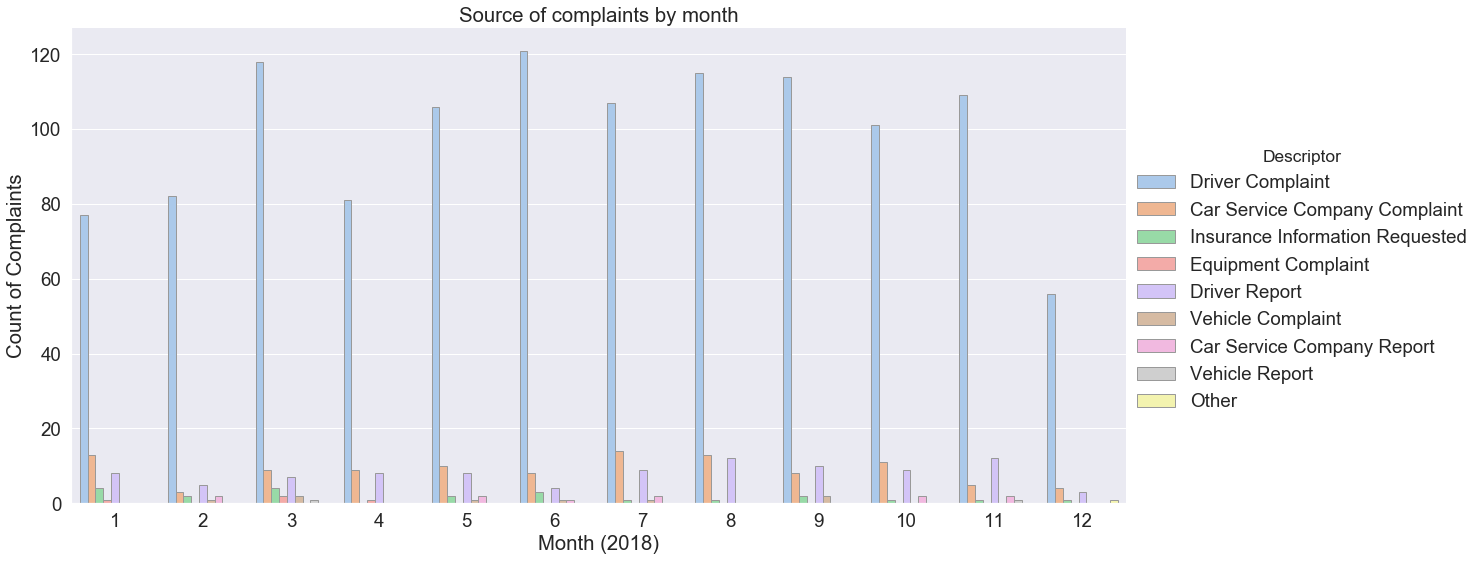

In [156]:
sns.set(font_scale=1.7)
ab = sns.catplot(x="month", hue="Descriptor", kind="count",
            palette="pastel", edgecolor=".6", height=8, aspect=2,
            data=tlc2018)
plt.title('Source of complaints by month')
plt.ylabel('Count of Complaints')
plt.xlabel('Month (2018)')
x_dates = tlc2018['month'].sort_values().unique()

TLC recived the most complaints from drivers.

Lets examine the type of complains recieved.

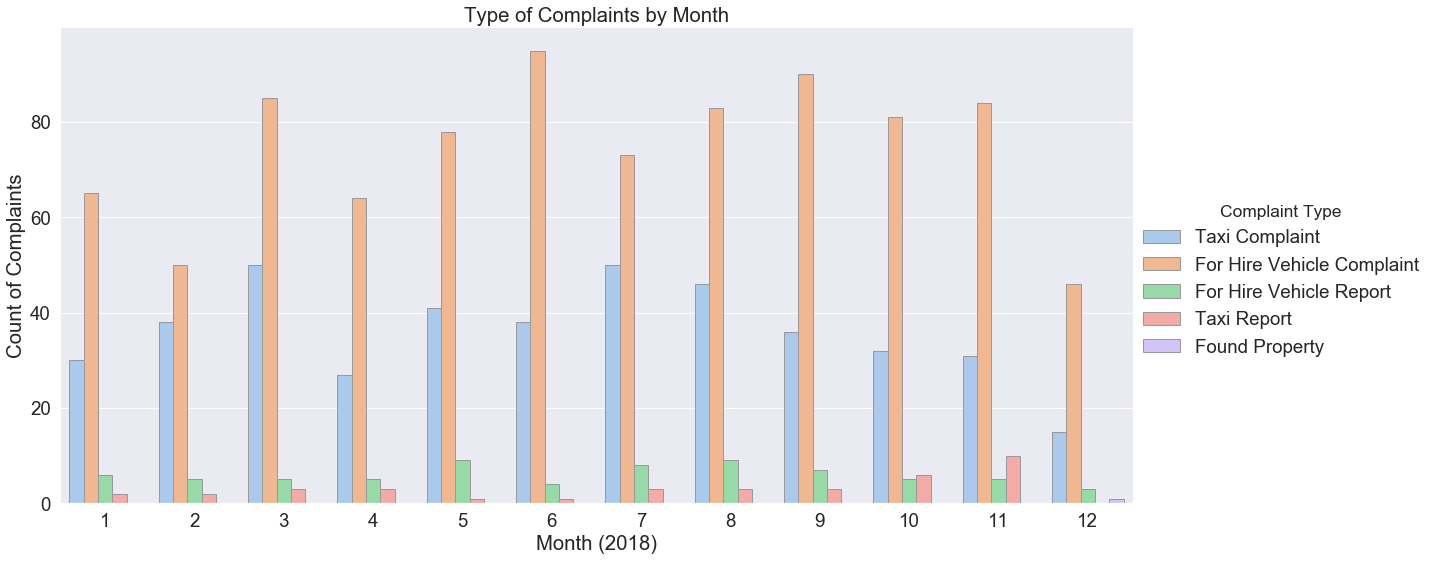

In [157]:
sns.set(font_scale=1.7)
ab2 = sns.catplot(x="month", hue="Complaint Type", kind="count",
            palette="pastel", edgecolor=".6", height=8, aspect=2,
            data=tlc2018)
plt.title('Type of Complaints by Month')
plt.ylabel('Count of Complaints')
plt.xlabel('Month (2018)')
x_dates = tlc2018['month'].sort_values().unique()

TLC received the most complaints regarding for hire vehicles followed by taxi complaints.

In [159]:
new = df[['Unique Key', 'Complaint Type', 'Descriptor']].copy()

Let's examine whom made the most complaints and the type of complaints.

In [144]:
table1 = new.set_index(['Complaint Type',  'Descriptor']).groupby(['Complaint Type', 'Descriptor']).count()

In [137]:
table1

Unique Key
Complaint Type             Descriptor                                 
For Hire Vehicle Complaint Car Service Company Complaint          1640
                           Driver Complaint                       3868
                           Equipment Complaint                      12
                           Insurance Information Requested          44
For Hire Vehicle Report    Car Service Company Report               44
                           Driver Report                           167
Found Property             Bag/Wallet                                9
                           Clothing/Glasses                          1
                           Electronics/Phones                       11
                           Other                                     6
Taxi Complaint             Driver Complaint                       3886
                           Insurance Information Requested          94
                           Vehicle Complaint                       105
Taxi Report                Driver Report                           177
                           Vehicle Report                            9

In [125]:
table1.index

MultiIndex(levels=[[u'For Hire Vehicle Complaint', u'For Hire Vehicle Report', u'Found Property', u'Taxi Complaint', u'Taxi Report'], [u'Bag/Wallet', u'Car Service Company Complaint', u'Car Service Company Report', u'Clothing/Glasses', u'Driver Complaint', u'Driver Report', u'Electronics/Phones', u'Equipment Complaint', u'Insurance Information Requested', u'Other', u'Vehicle Complaint', u'Vehicle Report']],
           labels=[[0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4], [1, 4, 7, 8, 2, 5, 0, 3, 6, 9, 4, 8, 10, 5, 11]],
           names=[u'Complaint Type', u'Descriptor'])

In [126]:
table1.index.levels[0]

Index([u'For Hire Vehicle Complaint', u'For Hire Vehicle Report',
       u'Found Property', u'Taxi Complaint', u'Taxi Report'],
      dtype='object', name=u'Complaint Type')

Drivers made the most complaints regarding fire hire vehicles and taxis.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

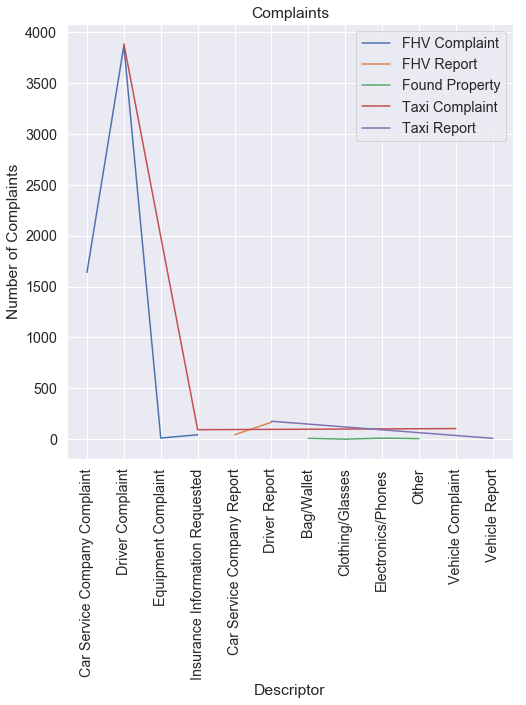

In [164]:
sns.set(font_scale=1.3)
x1 = plt.plot(table1.loc['For Hire Vehicle Complaint'])
x2 = plt.plot(table1.loc['For Hire Vehicle Report'])
x3 = plt.plot(table1.loc['Found Property'])
x4 = plt.plot(table1.loc['Taxi Complaint'])
x5 = plt.plot(table1.loc['Taxi Report'])
plt.title('Complaints')
plt.ylabel('Number of Complaints')
plt.xlabel('Descriptor')
plt.legend(['FHV Complaint', 'FHV Report', 'Found Property', 'Taxi Complaint', 'Taxi Report'])
plt.rcParams["figure.figsize"] = [8,8]
plt.xticks(rotation=90)

#### CONCLUSION

The data indicates that drivers made the most complaints regarding fire hire vehicles and taxis.

It would have been interesting to see a more descriptive information regarding the complaints made.